['.DS_Store', '002_png.rf.9b7a98ff8d0a227ff2b18d37395e9af5.jpg', '002_png.rf.9b7a98ff8d0a227ff2b18d37395e9af5.txt', '004_png.rf.5d0d90310dc584362c2fe26812b68ce7.jpg', '004_png.rf.5d0d90310dc584362c2fe26812b68ce7.txt', '005_png.rf.c1d49e5779519d7a351ec618fd1c3c85.jpg', '005_png.rf.c1d49e5779519d7a351ec618fd1c3c85.txt', '006_png.rf.d3ea4718de2a10770b003106e9a86ad7.jpg', '006_png.rf.d3ea4718de2a10770b003106e9a86ad7.txt', '007_png.rf.cc65b5c643e28735dac4aeeb92d043be.jpg']


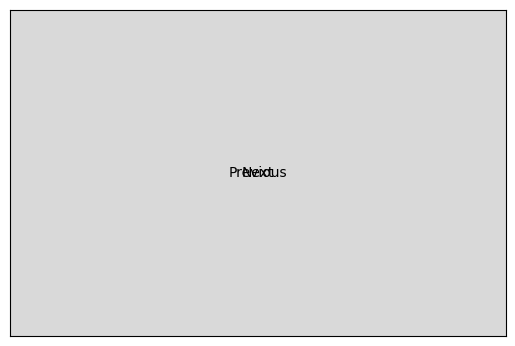

In [2]:
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

# Function to read annotation file
def read_annotation(file_path):
    with open(file_path, 'r') as f:
        annotations = f.readlines()
    return annotations

# Function to display image with bounding box
def display_image_with_bbox(image_path, annotations):
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)
    for annotation in annotations:
        class_id, x_center, y_center, width, height = map(float, annotation.split())
        # Convert YOLO format to bounding box coordinates
        x1 = int((x_center - width / 2) * img.width)
        y1 = int((y_center - height / 2) * img.height)
        x2 = int((x_center + width / 2) * img.width)
        y2 = int((y_center + height / 2) * img.height)
        # Draw bounding box
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Function to load previous image
def load_previous(event):
    global current_index
    current_index -= 1
    if current_index < 0:
        current_index = len(file_names) - 1
    display_image()

# Function to load next image
def load_next(event):
    global current_index
    current_index += 1
    if current_index >= len(file_names):
        current_index = 0
    display_image()

# Function to display image
def display_image():
    file_name = file_names[current_index]
    if file_name.endswith(".jpg"):
        image_path = os.path.join(folder, file_name)
        annotation_path = os.path.join(folder, file_name.replace(".jpg", ".txt"))
        annotations = read_annotation(annotation_path)
        display_image_with_bbox(image_path, annotations)

# Get list of image and annotation files
folder = "custom_data"
file_names = sorted(os.listdir(folder))
print(file_names[:10])
current_index = 0

# Create next and previous buttons
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
btn_prev = Button(ax, 'Previous')
btn_prev.on_clicked(load_previous)
btn_next = Button(ax, 'Next')
btn_next.on_clicked(load_next)

# Display first image
display_image()

plt.show()
